/Users/pengfei/env/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 25554 (\N{CJK UNIFIED IDEOGRAPH-63D2}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/pengfei/env/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


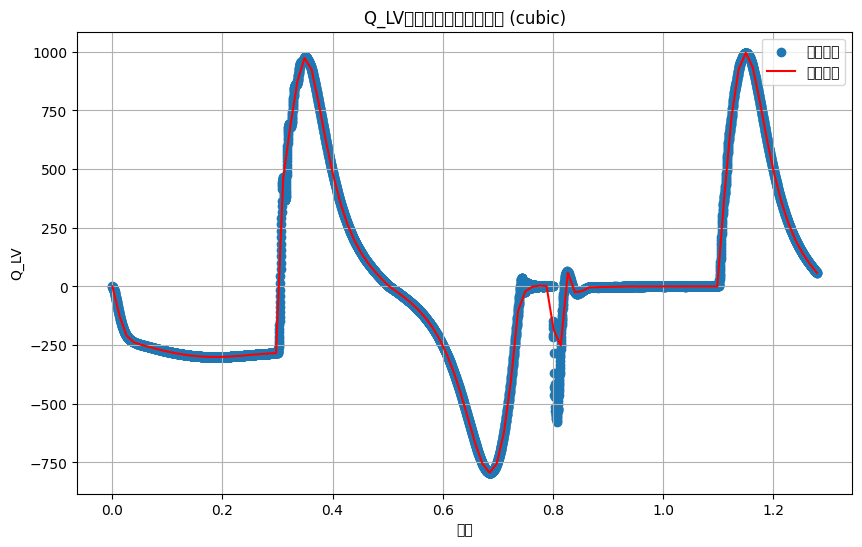

示例：
在t=0.001时，Q_LV = -4.034784244382195
在t=0.0015时(插值点)，Q_LV = -6.775080353728104


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
# 读取CSV文件
def read_csv(filename):
    with open(filename, 'r') as f:
        lines = f.readlines()
    data = []
    for line in lines[1:]:  # 跳过标题行
        parts = line.strip().split(',')
        data.append((int(parts[0]), float(parts[1])))
    return data

# 读取时间数据
time_data = read_csv('time.csv')  # 第一个CSV文件
# 读取Q_LV数据
q_lv_data = read_csv('truncated_LV_capacity.csv')  # 第二个CSV文件

# 提取步数和值
steps = np.array([x[0] for x in time_data])
time_values = np.array([x[1] for x in time_data])
q_lv_values = np.array([x[1] for x in q_lv_data])

# 提取步数和值
steps = np.array([x[0] for x in time_data])
time_values = np.array([x[1] for x in time_data])
q_lv_values = np.array([x[1] for x in q_lv_data])

# 使用interp1d创建插值函数
# kind可以是'linear', 'nearest', 'zero', 'slinear', 'quadratic', 'cubic'等
fun_Q_LV = interp1d(time_values, q_lv_values, kind='cubic', fill_value="extrapolate")

# 绘制原始数据和插值曲线
plt.figure(figsize=(10, 6))
plt.scatter(time_values, q_lv_values, label='原始数据')
t_fit = np.linspace(min(time_values), max(time_values), 100)
plt.plot(t_fit, fun_Q_LV(t_fit), 'r-', label='插值曲线')
plt.xlabel('时间')
plt.ylabel('Q_LV')
plt.legend()
plt.title('Q_LV随时间变化的插值曲线 (cubic)')
plt.grid(True)
plt.show()

# 测试插值函数
print("示例：")
print(f"在t=0.001时，Q_LV = {fun_Q_LV(0.001)}")
print(f"在t=0.0015时(插值点)，Q_LV = {fun_Q_LV(0.0015)}")

In [29]:
period = 0.8  
duration = 0.8
dt = 0.001 


P_LV_0 = 8.0 
P_AO_0 = 80.0 
P_SYS_0 = 0.0


R_C = 0.0 
R_LV= 0.8        
C_LV = 0.5

C_AO = 0.2

R_SYS = 10


def Windkessel_1(Q_LV, P_LV_1_n, dt):
    P_LV_1 = (C_LV*P_LV_1_n/dt+Q_LV)/(1/R_LV+C_LV/dt)
    P_LV = P_LV_1 + R_C*Q_LV
    return P_LV, P_LV_1

def Windkessel_2(P_AO_n, dt):
    P_AO = (-C_AO*P_AO_n/dt-P_SYS_0/R_SYS)/(-1/R_SYS-C_AO/dt)
    return P_AO


    

Step 0, Time: 0.00s
Q_LV at t=0.00s: -283.97 mL/s
Step 1, Time: 0.00s
Q_LV at t=0.00s: -276.17 mL/s
Step 2, Time: 0.00s
Q_LV at t=0.00s: -256.47 mL/s
Step 3, Time: 0.00s
Q_LV at t=0.00s: -209.47 mL/s
Step 4, Time: 0.00s
Q_LV at t=0.00s: -130.34 mL/s
Step 5, Time: 0.01s
Q_LV at t=0.01s: -13.61 mL/s
Step 6, Time: 0.01s
Q_LV at t=0.01s: 127.76 mL/s
Step 7, Time: 0.01s
Q_LV at t=0.01s: 265.04 mL/s
Step 8, Time: 0.01s
Q_LV at t=0.01s: 382.03 mL/s
Step 9, Time: 0.01s
Q_LV at t=0.01s: 446.14 mL/s
Step 10, Time: 0.01s
Q_LV at t=0.01s: 463.78 mL/s
Step 11, Time: 0.01s
Q_LV at t=0.01s: 441.69 mL/s
Step 12, Time: 0.01s
Q_LV at t=0.01s: 404.40 mL/s
Step 13, Time: 0.01s
Q_LV at t=0.01s: 373.49 mL/s
Step 14, Time: 0.01s
Q_LV at t=0.01s: 367.86 mL/s
Step 15, Time: 0.01s
Q_LV at t=0.01s: 393.83 mL/s
Step 16, Time: 0.02s
Q_LV at t=0.02s: 447.39 mL/s
Step 17, Time: 0.02s
Q_LV at t=0.02s: 517.85 mL/s
Step 18, Time: 0.02s
Q_LV at t=0.02s: 587.25 mL/s
Step 19, Time: 0.02s
Q_LV at t=0.02s: 644.15 mL/s
Step 

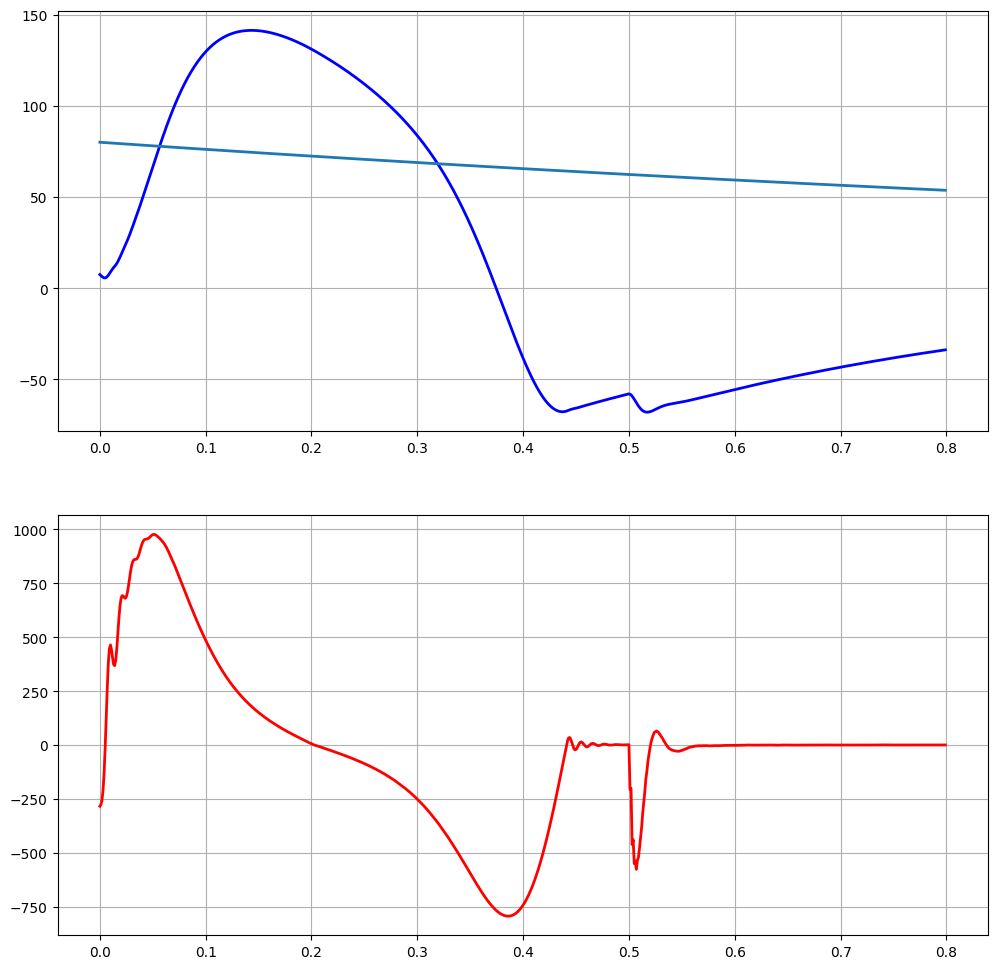

In [32]:
time_points = np.arange(0, duration, dt)
P_LV_values = np.zeros_like(time_points)
P_AO_values = np.zeros_like(time_points)
Q_LV_values = np.zeros_like(time_points)

P_LV_1_n = P_LV_0
P_AO_n = P_AO_0

for i, t in enumerate(time_points):
    print(f"Step {i}, Time: {t:.2f}s")
    Q_LV = fun_Q_LV(t + 0.3) 
    print(f"Q_LV at t={t:.2f}s: {Q_LV:.2f} mL/s")
    P_LV, P_LV_1_n = Windkessel_1(Q_LV, P_LV_1_n, dt)
    P_AO = Windkessel_2(P_AO_n, dt)
    P_AO_n = P_AO
    P_LV_values[i] = P_LV
    P_AO_values[i] = P_AO
    Q_LV_values[i] = Q_LV

# 绘制PLV曲线
plt.figure(figsize=(12, 12))

# PLV曲线
plt.subplot(2, 1, 1)
plt.plot(time_points, P_LV_values, 'b-', linewidth=2)
plt.plot(time_points, P_AO_values, linewidth=2)
# plt.xlabel('时间 (s)')
# plt.ylabel('P_LV (mmHg)')
# plt.title('左心室压力 (P_LV) 随时间变化曲线')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(time_points, Q_LV_values, 'r-', linewidth=2)
plt.grid(True)









